# Predicting House Prices of Washington Using Machine Learning

Hanna Seyoum

## Problem Statement

House prices generally tend to go up with time, with some probability of crashing. With price increase, or decrease, many families (either looking to buy or sell)  are affected. The goal is to predict current values of the houses so that buyers and sellers can make informed decisions.

## The Data

The data contains houses from the state of Washington with 18 attributes such as number of bedrooms and bathrooms, square footage of d/t parts of house, house location, etc. The dataset was acquired from Kaggle.

## Methodology

I have treated this as a supervised learning regression problem.

* Acquired dataset from Kaggle  
* Applied data wrangling & cleaning for feautre engineering and selection, and to handle missing values and outliers 
* Exploratory Data Analysis and Visualizations to find patterns and insights w.r.t various features in housing data  
* Hypothesis testing leveraging inferential statistics  
* Predictive modeling for house prices leveraging linear regression, ridge regression, and random forest regression. 

### Libraries

pandas for:  
    
    data loading, wrangling, cleaning, and manipulation  
    feature selection and engineering  
    descriptive statistics


numpy for:

    generate an array of values
    array sorting and manipulation
    

matplotlib and seaborn for:

    data visualization
    

scikit-learn for:

    data preprocessing
    regression and ensemble models
    cross-validation
    model selection
    model performance / metrics

### Data Wrangling & Cleaning

The data is a CSV file which I uploaded onto pandas as a data frame. A combination of feature engineering and selection was used. There were no NaNs, but instead there were 0s that indicated missing values in some entries.

#### Cleaning steps

* Used a combination of **feature engineering** & **feature selection**. The more the features the better, to a certain extent (i.e., curse of dimensionality), therefore I kept all features except for `statezip` which I deleted after splitting it into `state` and `zipcode` features. 

* Created a `month` feature by extracting the months from the `date` column to factor in how price is affected over time.

* Created a `total_sqft` feature by summing `sqft_living` and `sqft_lot`.

* Changed the data types of `waterfront` & `condition` features from `int` to `category` because they both have values `0` & `1` where 1 means yes & 0 means no.

* Split `statezip` feature into two features, `state` & `zipcode` and deleted the `statezip` after split.

#### Handling missing/zero values

* Found 2 houses with 0 bedrooms & 0 bathrooms that were priced over \$1 million. It was clear that they were erroneous data. Therefore I replaced the bedroom & bathroom values of both houses with the mean bedroom & bathroom values.

* The `yr_renovated` column is a numeric column with years of when the houses were last renovated, & 59.5\% of the rows have 0s as their value. I was not sure if the 0 meant that a house was never renovated, or if the renovation date was missing. I considered removing the column since 59.5\% of the rows are zeros, but instead of deleting the column, I added a boolean array column with 1s for all the houses that have a 0, and 0s for all the houses that have a renovation year listed.

* 1.1\% of the `Price` column has houses with 0 values. It is unlikely that the houses were worth \$0, so I did the same as with the `yr_renovated` column and added a boolean array column. I also created a new dataframe with these houses removed to compare it's models to the ones with \$0 house price included. There was a slight improvement in the models with the 0s removed. However, I don't think this improvement in model performance is worth removing 1.1\% of the data.

#### Outliers

* Found two 3-bedroom houses with prices over \$10 million. To check if they were outliers or possibly erroneous, I plotted a linear regression line of the `price` column & `sqft_living` column to check if the prices are high because of their square footage.

Result: They seem to be erroneous entries, so I created a new dataframe with both houses removed and compared it's model performance with the original dataframe's model. There was significant improvement in model performance. Therefore I've conducted remaining analysis with the dataframe exlcuding these 2 houses.

### Exploratory Data Analysis & Statistical Analysis Plots

#### Feature Observation

Some assumptions:

    Houses with more bedrooms will be worth more
    Houses with more bathrooms will be worth more
    Houses in bad condition will be worth less
    Houses with higher square footage will be worth more
    Houses with a waterfront will be worth more

* Plotted a heatmap of all the features and target variable to get an idea of their relationships.
* Plotted scatter plots of `price` against # of bedrooms, house size, and house condition. These plots showed a positive linear relationship between `sqft_living` & `price`, a non linear (polynomial) relationship between `bedrooms` & `price`, and the `condition` plot showed that houses in poor condition are worth much less than houses in moderate and good condition. Also, majority of the houses are in moderate condition, and the plot has a slightly parabolic shape.
* Plotted a barplot of `waterfront` vs `price` which showed that houses with waterfronts are worth more.
* Plotted a line plot of `yr_built` and `price`. This plot shows that house prices are higher with houses that are very old and also new. Old houses could be priced higher due to their historical value. 
* Plot of mean & median prices per bedrooms. Noticed a slight difference between the two plots, with mean prices being slightly larger than median prices. This could be due to some price outliers.
* Plot of mean & median house sizes per number of bedrooms. We see a strong positive linear relationship between `bedrooms` and `price`, and the mean & median plots are very similar.
* An ecdf plot of house prices by each month (may, june, & july) shows that house prices remained about the same in each month.

#### Hypothesis Test

For both hypotheses tested, a level of significance of α=0.05 was used as it has been commonly used by many statisticians.

Ho: Prices of houses with different number of bedrooms are equal.  
Ha: Prices of houses with different number of bedrooms were not equal.

#### Feature Importance

The heatmap gives us a visual representation of the features correlation with each other and with the target variable `price`. In addition to the heatmap, I wrote a function that calculates the importance of each feature in regards to its predictability of the target variable, i.e., the relationship of each feature with the target variable.

### Model Fitting

3 algorithms were used: Linear Regression, Ridge Regression & Random Forrest.
I fitted several models using the 3 algorithims, using data with outlier prices removed, data with price outliers & zero prices removed, and using data with both included. Also fitted some models with parabolic transformations of the `bedrooms` feature since it had a parabolic shape.

## Results

Our initial assumptions of the features are confirmed: 

`bedrooms` and `sqft_living` having a linear relationship with `price`. In contrast, `waterfront` has an inversely proportional relationship with `price`.

#### Accuracy Score Table

![alt text](accuracy_table.png "Accuracy Score Table")

I chose RMSE instead of MSE since RMSE gives us the price value, while MSE gives us the price squared.

## Model Limitations

Linear regression: assumes a straight line relationship between the features and target variable. My data did not have a linear relationship. House prices do increase as square footage and number of bedrooms increase, but once the square footage reaches a certain point, and once the houses get up to 6 bedrooms, the house prices start to decrease. Also, there aren't many houses with over 6 bedrooms, so the decrease in average price for houses with over 6 bedrooms could be due to lack of sufficient data.

Ridge regression: same as linear regression in that it assumes a linear relationship between the feature and target variables. 

Random forest regression:
Random Forest can’t extrapolate. It can only make a prediction that is an average of previously observed labels. Therefore, the range of predictions a Random Forest can make is bound by the highest and lowest labels in the training data.

## Conclusion

Out of the three models tried, Random Forest yielded the best prediction accuracy (highest $R^2$) , with the highest test score of around 63% accuracy. Linear Regression had the least best of all three. This is due to the data having many features that are not linearly correlated to the target variable `price`.

House size (`sqft_living`) holds the most importance in prediction.

## Data Preparation

In [6]:
# import necessary modules/libraries

import numpy as  np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr

from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("talk", font_scale=0.7)
sns.set_palette("Greens_r")
#set_palette("Set1", 8, .75) # makes plot lines red

# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

from sklearn.preprocessing import Imputer # to impute missing data

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

%matplotlib inline

# read the data
df1 = pd.read_csv('house_price_prediction.csv')
df2 = df1.copy()

# change date col to datetime
df2['date'] = pd.to_datetime(df2['date'])

# change data types of 'waterfront' & 'condition' to categorical
df2[['waterfront', 'condition']] = df1[['waterfront', 'condition']].astype('category')

## Feature Engineering

In [7]:
# splittig statezip into state & zipcode features & removing statezip
df2['state'] = df2['statezip'].apply(lambda x: x.split(' ')[0])
df2['zipcode'] = df2['statezip'].apply(lambda x: int(x.split(' ')[1]))
df2 = df2.drop('statezip', axis='columns')

# creating total_sqft feature: sqft_above + sqft_lot
df2['total_sqft'] = df2.sqft_living + df2.sqft_lot

# creating month feature
df2['month'] = pd.DatetimeIndex(df2['date']).month

df3 = df2.copy()

# creating a column of boolean arrays with 1s for when price is $0 & 0s for when price is not $0
df3['price_is_zero'] = (df3['price'] == 0).astype(int)

# creating a column of boolean arrays with 1s for when yr_renov is 0 & 0s for others
df3['renov_date_is_zero'] = (df3['yr_renovated'] == 0).astype(int)

# replacing 0s with the mean bedroom & bathroom values
df3["bedrooms"].replace({0: round(df3["bedrooms"].mean(), 0)}, inplace=True)
df3["bathrooms"].replace({0: round(df3["bathrooms"].mean(), 0)}, inplace=True)

# removing price outliers
df_no_outs = df3[df3.price < 10000000].copy()

# creating a new dataframe with $0 prices removed to compare later
df_no_zeros = df_no_outs[df_no_outs["price"] != 0].copy()

## Statistical Data Analysis

In [8]:
meanprice_bedrooms = df_no_zeros.groupby('bedrooms')['price'].mean()
medianprice_bedrooms = df_no_zeros.groupby('bedrooms')['price'].median()

meansqft_bedroom = df_no_zeros.groupby("bedrooms")["sqft_living"].mean()
mediansqft_bedroom = df_no_zeros.groupby("bedrooms")["sqft_living"].median()

may_price = df_no_zeros[df_no_zeros.month==5]['price']
june_price = df_no_zeros[df_no_zeros.month==6]['price']
july_price = df_no_zeros[df_no_zeros.month==7]['price']

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)

    x = np.sort(data)

    y = np.arange(1, n+1) / n

    return x, y

# Compute ECDFs
x_5, y_5 = ecdf(may_price)
x_6, y_6 = ecdf(june_price)
x_7, y_7 = ecdf(july_price)

### Feature Importance

In [9]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

def feature_importance(X, y, model='reg'):
    score_func = {'reg': f_regression}

    # Score each of the features
    bestfeatures = SelectKBest(score_func=score_func[model], k='all')
    fit = bestfeatures.fit(X, y)

    # Organize and return the scores
    featureScores = pd.DataFrame([X.columns, fit.scores_]).T
    featureScores.columns = ['Feature', 'Score']
    return featureScores.sort_values('Score', ascending=False).set_index('Feature') 

In [10]:
X = df_no_zeros.drop(['price', 'date', 'street', 'city', 'state', 'country'], axis='columns')
y = pd.DataFrame(df_no_zeros['price'].values.reshape(-1,1))

# Data Modeling

## Data Preprocessing

In [11]:
df_no_outs = df3[df3.price < 10000000]
df_no_zeros = df_no_outs[df_no_outs["price"] != 0]

# dataframe with both zero prices and outliers.
X = df3.drop(['price', 'date', 'street', 'city', 'state', 'country'], axis='columns')
y = df3["price"]
# splitting data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# dataframe without price outliers
X_no_outs = df_no_outs.drop(['price', 'date', 'street', 'city', 'state', 'country'], axis='columns')
y_no_outs = df_no_outs["price"]
X_train_no_outs, X_test_no_outs, y_train_no_outs, y_test_no_outs = train_test_split(X_no_outs, y_no_outs, test_size = 0.3, random_state=42)

# dataframe without $0 price values
X_no_zeros = df_no_zeros.drop(['price', 'date', 'street', 'city', 'state', 'country'], axis='columns')
y_no_zeros = df_no_zeros["price"]
X_train_no_zeros, X_test_no_zeros, y_train_no_zeros, y_test_no_zeros = train_test_split(X_no_zeros, y_no_zeros, test_size = 0.3, random_state=42)

# dataframe with a parabolic transformation on the `bedrooms` feature
X_transformed = df_no_zeros.drop(['price', 'date', 'street', 'city', 'state', 'country'], axis='columns')
X_transformed['bedrooms_squared'] = X['bedrooms']**2  # parabolic transformation of bedrooms
y_transformed = df_no_zeros['price']
X_train_transformed, X_test_transformed, y_train_transformed, y_test_transformed = train_test_split(X_transformed, y_transformed, test_size = 0.3, random_state=42)

In [12]:
set1 = [X_train, X_test, y_train, y_test]
set2 = [X_train_no_outs, X_test_no_outs, y_train_no_outs, y_test_no_outs]
set3 = [X_train_no_zeros, X_test_no_zeros, y_train_no_zeros, y_test_no_zeros]
set4 = [X_train_transformed, X_test_transformed, y_train_transformed, y_test_transformed]

sets = [set1, set2, set3, set4]

algorithms = [LinearRegression, Ridge, RandomForestRegressor]
names = ['linear regression', 'ridge regression ', 'random forest    ']

In [13]:
linear_score = []
ridge_score = []
forest_score = []

for sets in sets:
    # linear regression
    model = algorithms[0]()
    model.fit(sets[0], sets[2])
    y_pred = model.predict(sets[1])
    
    training_score = model.score(sets[0], sets[2])
    test_score = model.score(sets[1], sets[3])
    rmse = np.sqrt(mean_squared_error(sets[3], y_pred))
    
    print(names[0], "R^2: {}, RMSE: {}".format(test_score, rmse))
    linear_score.append(test_score)
    
    # ridge regression
    
    model = algorithms[1]()
    model.fit(sets[0], sets[2])
    y_pred = model.predict(sets[1])
    
    training_score = model.score(sets[0], sets[2])
    test_score = model.score(sets[1], sets[3])
    rmse = np.sqrt(mean_squared_error(sets[3], y_pred))
    
    print(names[1], "R^2: {}, RMSE: {}".format(test_score, rmse))
    
    ridge_score.append(test_score)
    
    # random forest
    
    model = algorithms[2]()
    model.fit(sets[0], sets[2])
    y_pred = model.predict(sets[1])
    
    training_score = model.score(sets[0], sets[2])
    test_score = model.score(sets[1], sets[3])
    rmse = np.sqrt(mean_squared_error(sets[3], y_pred))
    
    print(names[2], "R^2: {}, RMSE: {}".format(test_score, rmse))
    
    forest_score.append(test_score)

linear regression R^2: 0.0677794837057436, RMSE: 820661.0513756288
ridge regression  R^2: 0.06782834917275116, RMSE: 820639.5422421335
random forest     R^2: 0.07039100425595823, RMSE: 819510.7461424592
linear regression R^2: 0.5653871573329925, RMSE: 242953.0558186268
ridge regression  R^2: 0.5656890507214902, RMSE: 242868.6604033432
random forest     R^2: 0.6013102488627142, RMSE: 232695.84253765424
linear regression R^2: 0.5953517302538858, RMSE: 236687.2794862909
ridge regression  R^2: 0.5953049326209416, RMSE: 236700.96555024775
random forest     R^2: 0.6324581807295149, RMSE: 225574.21481275157
linear regression R^2: 0.595484911092392, RMSE: 236648.32614478978
ridge regression  R^2: 0.5954292749675731, RMSE: 236664.5996330863
random forest     R^2: 0.5989982861833023, RMSE: 235618.39231180714


In [14]:
features1 = 'all except date, price, street, city, state'
features2 = 'all except date, price, street, city, state'
features3 = 'all except date, price, street, city, state'
features4 = 'all except date, price, street, city, state'
features5 = 'all except date, price, street, city, state'
features6 = 'all except date, price, street, city, state'
features7 = 'all except date, price, street, city, state'
features8 = 'all except date, price, street, city, state'
features9 = 'all except date, price, street, city, state'
features10 = 'all except date, price, street, city, state'
features11 = 'all except date, price, street, city, state'
features12 = 'all except date, price, street, city, state'

content = {'features': [features1, features2, features3, features4, features5, features6, 
                        features7, features8, features9, features10, features11, features12], 
           'model': ['linear regression', 'linear regression', 'linear regression', 'linear regression',
                     'ridge regression', 'ridge regression', 'ridge regression', 'ridge regression', 
                     'random forest', 'random forest', 'random forest', 'random forest'], 
           'score': [linear_score[0], linear_score[1], linear_score[2], linear_score[3], 
                     ridge_score[0], ridge_score[1], ridge_score[2], ridge_score[3],  
                     forest_score[0], forest_score[1], forest_score[2], forest_score[3]],
           'description': ['no transformations', 'no transformations', 'zero prices removed', 'parabolic transformation', 
                           'no transformations', 'no transformations', 'zero prices removed', 'parabolic transformation', 
                           'no transformations', 'no transformations', 'zero prices removed', 'parabolic transformation'],
           'price outs removed': ['no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes']}

table = pd.DataFrame(content, columns=['model', 'score', 'price outs removed', 'description', 'features'], index=[1,2,3,4,5,6,7,8,9,10,11,12])
table.sort_values('score', ascending=False)

,model,score,price outs removed,description,features
11,random forest,0.632458,yes,zero prices removed,"all except date, price, street, city, state"
10,random forest,0.601310,yes,no transformations,"all except date, price, street, city, state"
12,random forest,0.598998,yes,parabolic transformation,"all except date, price, street, city, state"
4,linear regression,0.595485,yes,parabolic transformation,"all except date, price, street, city, state"
8,ridge regression,0.595429,yes,parabolic transformation,"all except date, price, street, city, state"
3,linear regression,0.595352,yes,zero prices removed,"all except date, price, street, city, state"
7,ridge regression,0.595305,yes,zero prices removed,"all except date, price, street, city, state"
6,ridge regression,0.565689,yes,no transformations,"all except date, price, street, city, state"
2,linear regression,0.565387,yes,no transformations,"all except date, price, street, city, state"
9,random forest,0.070391,no,no transformations,"all except date, price, street, city, state"


Text(0, 0.5, 'actualy price')

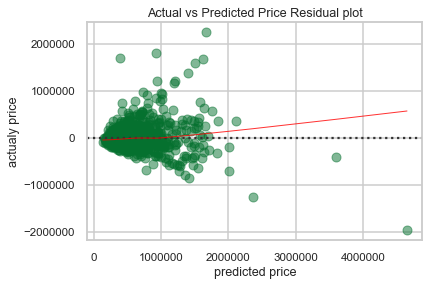

In [15]:
actual_price = y_test_transformed
predicted_price = y_pred

sns.residplot(predicted_price, actual_price, data=df_no_zeros,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plt.title('Actual vs Predicted Price Residual plot')
plt.xlabel('predicted price')
plt.ylabel('actualy price')